<center> <h1> <font color='Green'> GREEN TEAM <font> </h1> </center>

<h3><center><font color='GREEN'> 1. AAWAZ GAUTAM, 2. SONJOY PAUL AVI, 3. DHARMIK PATEL</font></center></h3>

<h3><center><font color='GREEN'>PROJECT ASSIGNMENT: ANALYSING AQUIFER AND GROUND WATER LEVEL OF SOUTHEST TEXAS</font></center></h3>

<p> Aquifer: Aquifer is a body of porous rock or sediment saturated with groundwater.
    There are two types of aquifer 1. Unconfined, 2. Confined</p>

<p> According to United States Geological Survey (USGS) figures, groundwater provides an estimated:
    1. 22% of all freshwater withdrawals.
    2. 37% of agricultural use (mostly for irrigation).
    3. 37% of the public water supply withdrawals.
    4. 51% of all drinking water for the total population.
    5. 99% of drinking water for the rural population . </p>

<p> <font> In this notebook we want to work with the data from GAM model, MOD Flow and HAGM model. We want to create a relational database and then graphically plot maps using those data. The potential areas could be aquifer depth change, water quality, etc</p>
<p>           </p>

In [ ]:
#Sources:
https://www.youtube.com/watch?v=S4Udx3c7LlQ


<h4><font color='GREEN'> Load Libraries </font> </h4>

In [1]:
# To hide warning sign not appear
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing numpy library
import numpy as np

<h4><font color='GREEN'> Importing the data from HAGM and from '.dis'(disintegration) file. </font> </h4>
Source: USGS Oklahoma-Texas Water Science Center. 

This MODFLOW2000 Discretization file has a flat file data representing 4 layer of aquifer on a grid of 137 rows and 245 columns. Initial data  10 columns and 17125 rows. This file stores the data of 5 layer(4top 1bottom) of 4 aquifers(Chicot, Evangeline, Burkeville and Jasper).
#We used numpy matrix shaping feature to seperate this flat datafile to retain the data for individual aquifer.

In [22]:
a=np.genfromtxt('D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\Data_HAGM2013.csv', delimiter=',')
a# The shape of this file is initially 17125 x 10.

array([[-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       ...,
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ..., -10000., -10000., -10000.],
       [-10000., -10000., -10000., ...,     nan,     nan,     nan]])

<h4><font> Reshaping the existing data to the form of 5 layers for 137 rows and 245 columns </font> </h4>

b=a.reshape(5,137,250)

<h4><font color='GREEN'> Separating the depth location of 5 layers for the 4 aquifers and also removing column having 'nan' value </font> </h4>

l1 = b[0][0:137,0:245]
l2 = b[1][0:137,0:245]
l3 = b[2][0:137,0:245]
l4 = b[3][0:137,0:245]
l5 = b[4][0:137,0:245]

We dealt with the rows and columns tabular data having numerical and string values

<h4><font color='GREEN'> Creating List table of databas that has Cell ID, ROW No, Col No, and the depth at which 4 tops of the aquifer exists and a bottom exists </font> </h4>

In [36]:
# Importing Pandas library 
#** We have to deal with the rows and columns tabular datas having numerical and string values
import pandas as pd

Table1 = pd.DataFrame(columns=['CELL_ID', 'L1', 'L2', 'L3','L4', 'L5'])
Table2 = pd.DataFrame(columns=['CELL_ID', 'ROW', 'COL'])

<h4><font color='GREEN'> Defining a range of numbers for rows number and column numbers and using a loop </font> </h4>

#The CELL_ID is the unique IDENTITY Number of each GRID and it is in the formula of: 10^6 + 10^3 Row No + Col No 

r1 = range(0,137)
r2 = range(0,245)
for i in r1:
    for j in r2:
        c=pow(10,6)+pow(10,3)*(i+1)+(j+1)
        tab1_col = {'CELL_ID':c, 'L1': l1[i,j], 'L2': l2[i,j], 'L3': l3[i,j], 'L4': l4[i,j], 'L5': l5[i,j]}
        tab2_col = {'CELL_ID':c,'ROW': i+1, 'COL': j+1 }
        Table1 = Table1.append(tab1_col, ignore_index = True)
        Table2 = Table2.append(tab2_col, ignore_index = True)

#Saving grid_info.csv-Table 1
Table2.to_csv(path_or_buf='D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\Tables\\grid_info.csv',index=False)

<h4><font color='GREEN'>DATABASE TABLE: Creating the table that will be going to our database.</font> </h4>
#The table name on database is 'lay_depth' has 3 columns CELL_ID, LAYER, DEPTH. 

lay=['L1', 'L2', 'L3', 'L4', 'L5']
Table1_new = pd.DataFrame(columns=['CELL_ID', 'LAYER', 'DEPTH'])
r3=range(0,len(Table1))
k=k1=0
for k in r3:
    temp=[Table1.L1[k], Table1.L2[k], Table1.L3[k], Table1.L4[k], Table1.L5[k]]
    for k1 in range(0,5):
        tab1new = {'CELL_ID':Table1.CELL_ID[k],'LAYER': lay[k1], 'DEPTH': temp[k1] }
        Table1_new = Table1_new.append(tab1new, ignore_index = True)

#Saving lay_depth.csv - Table2
Table1_new.to_csv(path_or_buf='D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\Tables\\lay_depth.csv',index=False)

This is an index table created that has the layer index and its description.

In [ ]:
TableX = pd.DataFrame(columns=['Layer', 'Description'])
TableX = TableX.append({'Layer':'L1', 'Description': 'Chicot Top'}, ignore_index = True)
TableX = TableX.append({'Layer':'L2', 'Description': 'Evangeline Top'}, ignore_index = True)
TableX = TableX.append({'Layer':'L3', 'Description': 'Burkeville Top'}, ignore_index = True)
TableX = TableX.append({'Layer':'L4', 'Description': 'Jasper Top'}, ignore_index = True)
TableX = TableX.append({'Layer':'L5', 'Description': 'Jasper Bottom'}, ignore_index = True)

TableX
#Saving Table 2 as csv.
TableX.to_csv(path_or_buf='D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\Tables\\layer_info.csv',index=False)

At this point we have imported raw data and built it up to tables now to clean up the memory we restart the kernel and then import the libraries and then the previously built tables 

<h4><font color='GREEN'>Importing the tables.</font> </h4>

In [4]:
grid_info = pd.read_csv("D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\Tables\\grid_info.csv")
lay_depth = pd.read_csv("D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\Tables\\lay_depth.csv")
layer_info = pd.read_csv("D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\Tables\\layer_info.csv")

<h4><font color='GREEN'>USING GEOPANDAS TO IMPORT SHAPE FILES OF GRID</font> </h4>
#We import shape files of grid(saved as from geo data base) because we want to preserve geometry of grid in our codes

In [7]:
# Importing GeoPandas library  
# We import shape files of grid(saved as from geo data base) because we want to preserve geometry of grid in our codes.
import geopandas as gpd

<h4><font color='GREEN'>Importing Well Main Table(Ground Water Database) from Texas Water Development Board.</font> </h4>

In [45]:
df_wm = pd.read_csv("D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\inputs\\WellMain.csv", usecols = ['StateWellNumber','County','AquiferCode','Aquifer','LatitudeDD','LongitudeDD','WellDepth','LandSurfaceElevation'])
# Creating a geometry column 
geodf= gpd.GeoDataFrame(df_wm, geometry=gpd.points_from_xy(df_wm.LongitudeDD, df_wm.LatitudeDD, crs="EPSG:4326"))# WGS84 System: crs='EPSG:4326'
well_main = geodf.to_crs(4269) # NAD83 System: crs='EPSG:4269'
well_main.head()

,StateWellNumber,County,AquiferCode,Aquifer,LatitudeDD,LongitudeDD,WellDepth,LandSurfaceElevation,geometry
0,140301,Dallam,121OGDP,Ogallala/Rita Blanca,36.493333,-103.039167,470.0,4702.0,POINT (-103.03917 36.49333)
1,140302,Dallam,121OGDP,Ogallala/Rita Blanca,36.467500,-103.004445,180.0,4644.0,POINT (-103.00445 36.46750)
2,140601,Dallam,211DKOP,Rita Blanca,36.435000,-103.021389,390.0,4692.0,POINT (-103.02139 36.43500)
3,140901,Dallam,121OGLL,Ogallala,36.383611,-103.015000,346.0,4669.0,POINT (-103.01500 36.38361)
4,140902,Dallam,121OGLD,Ogallala/Rita Blanca,36.408333,-103.036944,160.0,4690.0,POINT (-103.03694 36.40833)


In [44]:
df2 = gpd.read_file('D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\inputs\\GRID.zip')   # shape file of grid
tab3_rem_col = ['CELL_ID','CountyName','CountyNum','CentroidX','CentroidY','AQ_Active1','AQ_Active2','AQ_Active3', 'AQ_Active4', 'geometry']
Table3 = df2.filter(tab3_rem_col, axis=1)
grid_detail=Table3.to_crs(4269)   # Converting the grid geometry to Equal Albers Area Projection
grid_detail.head()

,CELL_ID,CountyName,CountyNum,CentroidX,CentroidY,AQ_Active1,AQ_Active2,AQ_Active3,AQ_Active4,geometry
0,1001001,Caldwell,28,5.737261e+06,1.915459e+07,0,0,0,0,"POLYGON ((-97.43502 29.77012, -97.42158 29.778..."
1,1001002,Caldwell,28,5.741444e+06,1.915782e+07,0,0,0,0,"POLYGON ((-97.42158 29.77869, -97.40814 29.787..."
2,1001003,Caldwell,28,5.745627e+06,1.916104e+07,0,0,0,0,"POLYGON ((-97.40814 29.78727, -97.39469 29.795..."
3,1001004,Caldwell,28,5.749810e+06,1.916426e+07,0,0,0,0,"POLYGON ((-97.39469 29.79584, -97.38124 29.804..."
4,1001005,Caldwell,28,5.753994e+06,1.916748e+07,0,0,0,0,"POLYGON ((-97.38124 29.80441, -97.36779 29.812..."


In [37]:
well_main_ng = pd.DataFrame(well_main.drop(columns='geometry'))
grid_detail_ng = pd.DataFrame(grid_detail.drop(columns='geometry'))

<h4><font color='GREEN'>Spatially Joining the Well main and Grid table.</font> </h4>
For all the well number we are trying to find the grid in which it occurs.

In [46]:
well_cell_ij = well_main.sjoin(grid_detail, how="inner")
well_cell_ij=well_cell_ij.reset_index()
w_c_ij = ['StateWellNumber','CELL_ID']
well_cell = well_cell_ij.filter(w_c_ij, axis=1)
well_cell.head()

,StateWellNumber,CELL_ID
0,3617502,1013245
1,3617801,1016244
2,3617802,1015245
3,3617803,1015244
4,3625101,1017240


<h4><font color='GREEN'>CREATING RELATIONAL DATABASE </font> </h4>

In [1]:
import os
path_db = 'D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\DB23'
os.chdir(path_db)
os.getcwd()

'D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\DB23'

In [2]:
import sqlite3
con= sqlite3.connect("Proj23.db")

grid_info.to_sql('grid_info', con, index=False)
layer_info.to_sql('layer_info',con, index=False)
lay_depth.to_sql('lay_depth',con, index=False)

con.commit()
cur = con.cursor()

<h4><font color='GREEN'> CREATING EMPTY DATABASE WITH Cell_ID as primary Key AND COPYING DATA FROM EXISTING TABLE. </font> </h4>

In [57]:
cur.execute("""BEGIN TRANSACTION;""") #starting the process to edit database saved in cur variable
cur.execute("""ALTER TABLE grid_info RENAME TO old_grid_info;""") # renaming the existing table because we dont want to have same name for the table with keys
cur.execute("""
CREATE TABLE grid_info
(
 CELL_ID INTEGER,
 ROW INTEGER,
 COLUMN INTEGER,
 CONSTRAINT CELL_ID_pk PRIMARY KEY (CELL_ID)
);
""") # Creating a table specifying primary key

cur.execute("""INSERT INTO grid_info SELECT * FROM old_grid_info;""") # copying the content of old table to new table
cur.execute("""DROP TABLE old_grid_info """)#Syntax to Delete old table
cur.execute("""COMMIT;""") # closing the transaction by saving the changes

In [ ]:
#Replicating the layer description table in sql database specifying primary key.
#Make Layer as primary Key(primary key name: LAYER_pk)

In [58]:
cur.execute("""BEGIN TRANSACTION;""") #starting the process to edit database saved in cur variable
cur.execute("""ALTER TABLE layer_info RENAME TO old_layer_info;""") # renaming the existing table because we dont want to have same name for the table with keys
cur.execute("""
CREATE TABLE layer_info
(
 LAYER TEXT,
 DESCRIPTION TEXT,
 CONSTRAINT LAYER_pk PRIMARY KEY (LAYER)
);
""") # Creating a table specifying primary key

cur.execute("""INSERT INTO layer_info SELECT * FROM old_layer_info;""") # copying the content of old table to new table
cur.execute("""DROP TABLE old_layer_info """)#Syntax to Delete old table
cur.execute("""COMMIT;""") # closing the transaction by saving the changes

In [ ]:
#Replicating the layer depth table in sql database specifying foreign key.
#Make Layer as primary Key

In [59]:
cur.execute("""BEGIN TRANSACTION;""") #starting the process to edit database saved in cur variable
cur.execute("""ALTER TABLE lay_depth RENAME TO old_lay_depth;""") # renaming the existing table because we dont want to have same name for the table with keys
cur.execute("""
CREATE TABLE lay_depth
(
 CELL_ID REAL,
 LAYER TEXT,
 DEPTH REAL,
 FOREIGN KEY (LAYER) REFERENCES lay_desc(LAYER),
 FOREIGN KEY (CELL_ID) REFERENCES grid_cell_desc(CELL_ID)
);
""") # Creating a table specifying primary key

cur.execute("""INSERT INTO lay_depth SELECT * FROM old_lay_depth;""") # copying the content of old table to new table
cur.execute("""DROP TABLE old_lay_depth """)#Syntax to Delete old table
cur.execute("""COMMIT;""") # closing the transaction by saving the changes

In [30]:
#Query
query=cur.execute("""SELECT 
    DEPTH
FROM 
    lay_depth
INNER JOIN grid_info 
    ON grid_info.CELL_ID = lay_depth.CELL_ID WHERE grid_info.ROW=1 AND grid_info.COLUMN=1;""")

results = cur.fetchall()

print(results)

[(-10000.0,), (-10000.0,), (-10000.0,), (-10000.0,), (-10000.0,)]


<h4><font color='GREEN'>USING GEOPANDAS TO IMPORT SHAPE FILES OF GRID</font> </h4>
#We import shape files of grid(saved as from geo data base) because we want to preserve geometry of grid in our codes

In [34]:
# Importing GeoPandas library  
# We import shape files of grid(saved as from geo data base) because we want to preserve geometry of grid in our codes.
import geopandas as gpd

<h4><font color='GREEN'>Importing Well Main Table(Ground Water Database) from Texas Water Development Board.</font> </h4>

In [84]:
df_wm = pd.read_csv("D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\inputs\\WellMain.csv", usecols = ['StateWellNumber','County','AquiferCode','Aquifer','LatitudeDD','LongitudeDD','WellDepth','LandSurfaceElevation'])
# Creating a geometry column 
geodf= gpd.GeoDataFrame(df_wm, geometry=gpd.points_from_xy(df_wm.LongitudeDD, df_wm.LatitudeDD, crs="EPSG:4326"))# WGS84 System: crs='EPSG:4326'
well_main = geodf.to_crs(4269) # NAD83 System: crs='EPSG:4269'
well_main.head()

,StateWellNumber,County,AquiferCode,Aquifer,LatitudeDD,LongitudeDD,WellDepth,LandSurfaceElevation,geometry
0,140301,Dallam,121OGDP,Ogallala/Rita Blanca,36.493333,-103.039167,470.0,4702.0,POINT (-103.03917 36.49333)
1,140302,Dallam,121OGDP,Ogallala/Rita Blanca,36.467500,-103.004445,180.0,4644.0,POINT (-103.00445 36.46750)
2,140601,Dallam,211DKOP,Rita Blanca,36.435000,-103.021389,390.0,4692.0,POINT (-103.02139 36.43500)
3,140901,Dallam,121OGLL,Ogallala,36.383611,-103.015000,346.0,4669.0,POINT (-103.01500 36.38361)
4,140902,Dallam,121OGLD,Ogallala/Rita Blanca,36.408333,-103.036944,160.0,4690.0,POINT (-103.03694 36.40833)


In [40]:
df2 = gpd.read_file('D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\inputs\\GRID.zip')   # shape file of grid
tab3_rem_col = ['CELL_ID','CountyName','CountyNum','CentroidX','CentroidY','AQ_Active1','AQ_Active2','AQ_Active3', 'AQ_Active4', 'geometry']
Table3 = df2.filter(tab3_rem_col, axis=1)
grid_detail=Table3.to_crs(4269)   # Converting the grid geometry to Equal Albers Area Projection
grid_detail.head()

,CELL_ID,CountyName,CountyNum,CentroidX,CentroidY,AQ_Active1,AQ_Active2,AQ_Active3,AQ_Active4,geometry
0,1001001,Caldwell,28,5.737261e+06,1.915459e+07,0,0,0,0,"POLYGON ((-97.43502 29.77012, -97.42158 29.778..."
1,1001002,Caldwell,28,5.741444e+06,1.915782e+07,0,0,0,0,"POLYGON ((-97.42158 29.77869, -97.40814 29.787..."
2,1001003,Caldwell,28,5.745627e+06,1.916104e+07,0,0,0,0,"POLYGON ((-97.40814 29.78727, -97.39469 29.795..."
3,1001004,Caldwell,28,5.749810e+06,1.916426e+07,0,0,0,0,"POLYGON ((-97.39469 29.79584, -97.38124 29.804..."
4,1001005,Caldwell,28,5.753994e+06,1.916748e+07,0,0,0,0,"POLYGON ((-97.38124 29.80441, -97.36779 29.812..."


In [41]:
well_main_ng = pd.DataFrame(well_main.drop(columns='geometry'))
grid_detail_ng = pd.DataFrame(grid_detail.drop(columns='geometry'))

In [53]:
well_cell_ij = well_main.sjoin(grid_detail, how="inner")
well_cell_ij=well_cell_ij.reset_index()
#w_c_ij = ['StateWellNumber','CELL_ID']
well_cell = well_cell_ij.filter(w_c_ij, axis=1)
well_cell_ij.head()

,index,StateWellNumber,County,AquiferCode,Aquifer,LatitudeDD,LongitudeDD,WellDepth,LandSurfaceElevation,geometry,index_right,CELL_ID,CountyName,CountyNum,CentroidX,CentroidY,AQ_Active1,AQ_Active2,AQ_Active3,AQ_Active4
0,55364,3617502,Shelby,124WLCX,Carrizo-Wilcox,31.679722,-93.958612,31.0,260.0,POINT (-93.95861 31.67972),3184,1013245,Shelby,210,6.796587e+06,1.989054e+07,0,0,0,0
1,55366,3617801,Shelby,NOT-APPL,Unassigned,31.627778,-93.949167,NaN,276.0,POINT (-93.94917 31.62778),3918,1016244,Shelby,210,6.802070e+06,1.987477e+07,0,0,0,0
2,55367,3617802,Shelby,124WLCX,Carrizo-Wilcox,31.655278,-93.931667,50.0,325.0,POINT (-93.93167 31.65528),3674,1015245,Shelby,210,6.803031e+06,1.988218e+07,0,0,0,0
3,55368,3617803,Shelby,124WLCX,Carrizo-Wilcox,31.640834,-93.949445,143.0,312.0,POINT (-93.94944 31.64083),3673,1015244,Shelby,210,6.798848e+06,1.987896e+07,0,0,0,0
4,55372,3625101,Shelby,124WLCX,Carrizo-Wilcox,31.589167,-93.987222,232.0,302.0,POINT (-93.98722 31.58917),4159,1017240,Shelby,210,6.788561e+06,1.985770e+07,0,0,0,0


<h4><font color='GREEN'>Adding More table to database.</font> </h4>

In [56]:
con= sqlite3.connect("Proj23.db")

well_main_ng.to_sql('well_main', con, index=False)
grid_detail_ng.to_sql('grid_detail',con, index=False)
well_cell.to_sql('well_cell',con, index=False)

con.commit()
cur = con.cursor()

<h4><font color='GREEN'>Joining Tables by Values.</font> </h4>

In [57]:
#joining table well_cell and well_main.
cur.execute("""CREATE TABLE X AS SELECT * 
FROM well_main
INNER JOIN well_cell ON well_main.StateWellNumber = well_cell.StateWellNumber;""")

results = cur.fetchall()

In [58]:
#joining table well_cell and grid_detail.
cur.execute("""CREATE TABLE Y AS SELECT * 
FROM grid_detail
INNER JOIN well_cell ON grid_detail.CELL_ID = well_cell.CELL_ID;""")

results = cur.fetchall()

In [34]:
# Importing Grid Shapefile
# We got geo database package in our GAM files, we imported that to QGIS converted to ESRI SHapefile.

<AxesSubplot:>

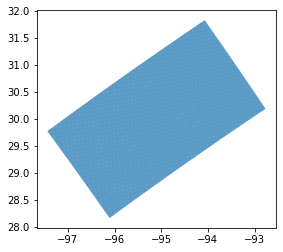

In [85]:
grid_f = 'D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\inputs\\GRID.zip'
grid = gpd.read_file(grid_f)
grid=grid.to_crs(4269)
grid.plot()

<h1><font color='GREEN'>VISUALIZATION.</font> </h1>

In [79]:
cnty_f = 'D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\inputs\\TX_County.zip'
cnty = gpd.read_file(cnty_f)
se = cnty[cnty.CNTY_NM.isin(["Jefferson","Newton","Orange","Chambers","Galveston","Harris","Montgomery","Walker","San Jacinto","Polk","Tyler","Jasper","Liberty","Hardin",])] # its crs is 4326
southeast = se.to_crs(4269) # NAD83 System: crs='EPSG:4269'

In [120]:
southeast.to_file('D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\shp_elv\\southeast.shp')

In [122]:
wlm = pd.read_csv("D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\inputs\\WaterLevelsMajor.csv", usecols = ['StateWellNumber','WaterElevation'])
mean_wl=wlm.groupby('StateWellNumber').mean()
we_inner = pd.merge(well_main, mean_wl, on='StateWellNumber', how='inner')
we_inner.head()

,StateWellNumber,County,AquiferCode,Aquifer,LatitudeDD,LongitudeDD,WellDepth,LandSurfaceElevation,geometry,WaterElevation
0,140901,Dallam,121OGLL,Ogallala,36.383611,-103.015000,346.0,4669.0,POINT (-103.01500 36.38361),4585.743750
1,148301,Dallam,121OGLL,Ogallala,36.357501,-103.026111,132.0,4605.0,POINT (-103.02611 36.35750),4523.866000
2,148902,Dallam,121OGLL,Ogallala,36.251389,-103.004167,235.0,4531.0,POINT (-103.00417 36.25139),4370.618500
3,156301,Dallam,121OGLL,Ogallala,36.240834,-103.031667,303.0,4570.0,POINT (-103.03167 36.24083),4420.772353
4,156308,Dallam,121OGLL,Ogallala,36.236945,-103.020000,287.0,4551.0,POINT (-103.02000 36.23694),4481.000000


In [125]:
clip_we_by_cnty=gpd.clip(we_inner, southeast)
clip_we_by_cnty.head()

,StateWellNumber,County,AquiferCode,Aquifer,LatitudeDD,LongitudeDD,WellDepth,LandSurfaceElevation,geometry,WaterElevation
20916,3764301,Jasper,122CTHL,Gulf Coast,31.110001,-94.023611,24.0,210.0,POINT (-94.02361 31.11000),192.300
20422,3657201,Jasper,122CTHL,Gulf Coast,31.123333,-93.943056,185.0,236.0,POINT (-93.94306 31.12333),195.500
20420,3657105,Jasper,122CTHL,Gulf Coast,31.123889,-93.983611,360.0,240.0,POINT (-93.98361 31.12389),160.305
20902,3756903,Jasper,122CTHL,Gulf Coast,31.133055,-94.001389,24.0,220.0,POINT (-94.00139 31.13305),207.400
20406,3649801,Jasper,122CTHL,Gulf Coast,31.140278,-93.938611,14.0,242.0,POINT (-93.93861 31.14028),229.100


In [119]:
clip_we_by_cnty.to_file('D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\shp_elv\\clip_we_by_cnty.shp')

C:\Users\aawaz\AppData\Local\Temp\ipykernel_13636\1519235273.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  clip_we_by_cnty.to_file('D:\\Fall22\\Python\\Capstone-project-II\\Nov_4\\shp_elv\\clip_we_by_cnty.shp')


In [124]:
avgdepth_cnty=clip_we_by_cnty.groupby('County').mean()
avgdepth_cnty

,StateWellNumber,LatitudeDD,LongitudeDD,WellDepth,LandSurfaceElevation,WaterElevation
County,,,,,,
Chambers,6.414590e+06,29.764989,-94.703468,244.528067,22.605809,-4.984246
Galveston,6.497169e+06,29.409672,-95.015314,723.326360,15.589958,-70.487183
Hardin,6.146963e+06,30.291452,-94.422862,293.126761,75.371560,50.016231
Harris,6.468932e+06,29.816603,-95.398281,759.454998,77.058638,-106.900222
Jasper,5.887956e+06,30.713961,-94.010263,318.964052,162.045161,127.527371
Jefferson,6.286827e+06,29.971459,-94.181358,258.959596,20.696970,7.177084
Liberty,6.162046e+06,30.156457,-94.831211,439.777457,81.788571,36.142703
Montgomery,6.046863e+06,30.284595,-95.492242,482.021075,202.745303,101.387667
Newton,5.666966e+06,30.793662,-93.737732,198.619565,169.607527,144.846354


In [129]:
import matplotlib.pyplot as plt

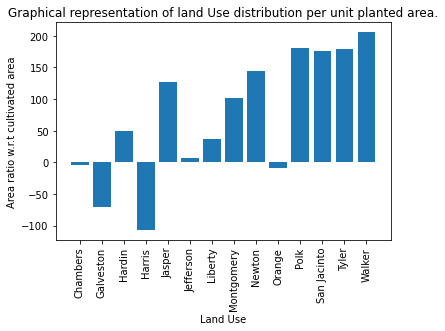

In [131]:
#Plotting bar graph of land use in ratio to planted area.
cnty_list=["Chambers","Galveston","Hardin","Harris","Jasper","Jefferson","Liberty","Montgomery","Newton","Orange","Polk","San Jacinto","Tyler","Walker" ]
plt.bar(cnty_list, avgdepth_cnty.WaterElevation)
plt.title('Average Water elevation of Graphical representation of land Use distribution per unit planted area.') # title
plt.xlabel('Land Use') # x axis name
plt.ylabel('Area ratio w.r.t cultivated area') # y axis name
pl = plt.gca() # gca function used to get the current instance axes.
pl.tick_params(axis='x', labelrotation = 90) # to rorate the names of land use by 90 degree.
plt.show()# plot